In [36]:
import pandas as pd
import numpy as np

sr = pd.read_csv('files/SuicideRates.csv')
cc = pd.read_csv('files/GlobalLandTemperaturesByCountry.csv')

In [2]:
sr.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [3]:
cc.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [5]:
sr['country'].unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

In [37]:
cc = cc.copy()[cc['Country'].isin(sr['country'].unique())]

In [8]:
cc['Country'].unique()

array(['Albania', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Brazil', 'Bulgaria', 'Canada', 'Chile',
       'Colombia', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czech Republic', 'Denmark', 'Dominica', 'Ecuador', 'El Salvador',
       'Estonia', 'Fiji', 'Finland', 'France', 'Georgia', 'Germany',
       'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary', 'Iceland',
       'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Kazakhstan',
       'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia', 'Lithuania',
       'Luxembourg', 'Macau', 'Malta', 'Mauritius', 'Mexico', 'Mongolia',
       'Montenegro', 'Netherlands', 'New Zealand', 'Nicaragua', 'Norway',
       'Oman', 'Panama', 'Paraguay', 'Philippines', 'Poland', 'Portugal',
       'Puerto Rico', 'Qatar', 'Romania', 'Saint Lucia', 'San Marino',
       'Serbia', 'Seychelles', 'Singapore', 'Slovakia', 'Slovenia',
       'South 

In [13]:
def convert_to_year(date):
    try:
        return pd.to_datetime(date).year
    except:
        return np.NaN

In [38]:
%%time
cc['dt'] = list(map(convert_to_year, cc['dt']))
cc.head()

Wall time: 39.4 s


,dt,AverageTemperature,AverageTemperatureUncertainty,Country
7310,1743,8.62,2.268,Albania
7311,1743,NaN,NaN,Albania
7312,1744,NaN,NaN,Albania
7313,1744,NaN,NaN,Albania
7314,1744,NaN,NaN,Albania


In [39]:
cc.dropna(inplace=True)

In [40]:
cc = cc.copy()[cc['dt'] >= 1987]

In [41]:
cc.set_index('dt', inplace=True)

In [42]:
cc = cc.copy()[['AverageTemperature', 'Country']]

In [43]:
cc.head(15)

,AverageTemperature,Country
dt,,
1987,3.798,Albania
1987,5.976,Albania
1987,3.304,Albania
1987,11.032,Albania
1987,14.444,Albania
1987,19.840,Albania
1987,24.084,Albania
1987,22.041,Albania
1987,21.706,Albania


In [46]:
cc = cc.groupby(['dt', 'Country']).mean()

In [62]:
sr.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [63]:
sr.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [64]:
sr = sr.copy()[['country','year','suicides_no','population','sex']]

In [65]:
sr.head()

,country,year,suicides_no,population,sex
0,Albania,1987,21,312900,male
1,Albania,1987,16,308000,male
2,Albania,1987,14,289700,female
3,Albania,1987,1,21800,male
4,Albania,1987,9,274300,male


In [66]:
sr.rename(columns={'country':'Country', 'year':'dt'}, inplace=True)

In [71]:
sr = sr.copy()[sr['Country'].isin(cc.index.levels[1].unique())]
sr = sr.groupby(['dt', 'Country']).sum()

In [78]:
df = pd.merge(cc, sr, left_index=True, right_index=True)

In [79]:
df.head()

AverageTemperature  suicides_no  population
dt   Country                                               
1987 Albania             12.996583           73     2709600
     Argentina           15.187500         2286    27599400
     Australia           22.072417         2164    15046500
     Austria              6.169500         2069     7130006
     Bahamas             25.600917            3      220900

In [81]:
df.reset_index(inplace=True)

In [83]:
df_save = df.copy()

In [84]:
df['suicide%'] = df['suicides_no'] / df['population'] * 100

In [85]:
df.set_index('dt', inplace=True)

In [86]:
df_at = df.copy()[['AverageTemperature', 'suicide%']]

In [87]:
df_at.set_index('AverageTemperature', inplace=True)

In [88]:
df_at.sort_index(ascending=True, inplace=True)

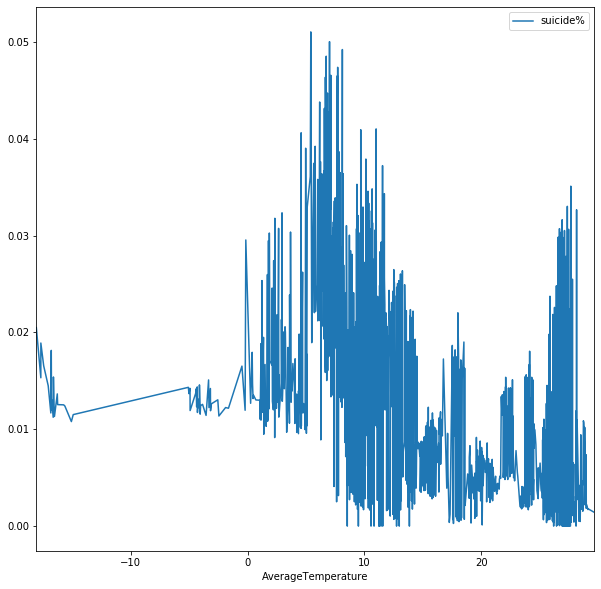

In [91]:
df_at.plot(figsize=(10,10))

In [98]:
df_at['suicide%smoothed'] = df_at.rolling(30).mean()

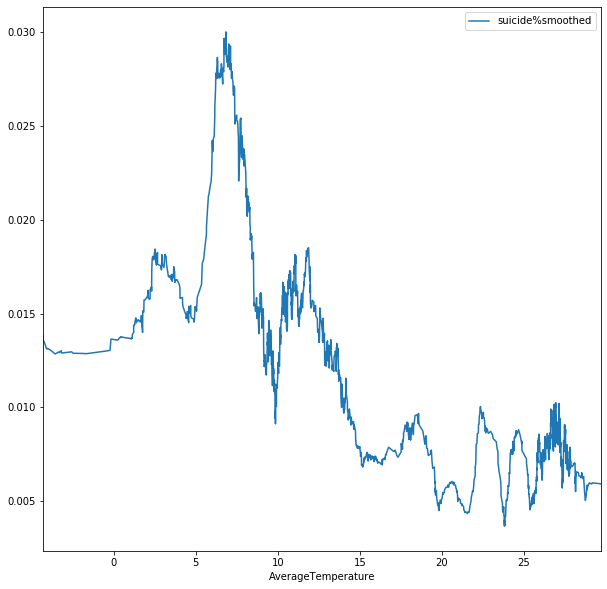

In [101]:
df_at['suicide%smoothed'].dropna().plot(figsize=(10,10), legend=True)

In [97]:
df_at.to_csv('files/AverageTemperatureAndSuicides.csv')